# Using k-fold cross-validation to assess model performance

What is model evaluation about?
- If the model is too simple, it can suffer from underfitting (high bias)
- If its too complex, it can overfit the training data (high variance)
- To find an acceptable bias-variance trade-off, we need to evaluate our model carefully.
- Model validation helps estimate model's generalization error reliably
- (<html> <u>Generalization Error:</u></html> how well the model performs on unseen data)


# Let's learn about the following 2 cross-validation techniques:
    1. holdout cross-validation and
    2. k-fold cross-validation

# The holdout method
- In this, we split original set into 3 parts: TrainingSet, ValidationSet and Test Set. 
- <html> <u>Reason</u></html>: If we reuse the same test dataset over and over again during model selection, it will become part of our training data and thus the model will be more likely to overfit. Despite this issue, many people still use the test set for model selection, which is not a good machine learning practice. With Hold-out technique, we are isolating test data completely. 

Following image depicts what holdout is:

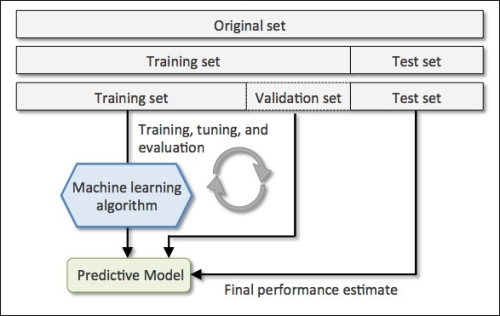

In [1]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/hold-out-cross-validation.jpg")

<html><u>Disadvantage of the holdout method</u></html>: is that the performance estimate is sensitive to how we partition the training set into the training and validation subsets; the estimate will vary for different samples of the data. 

# Solution: K-fold cross validation
- A more robust technique for performance estimation
- In this, we repeat holdout method k times on k subsets of the training data.
- We randomly split the training dataset into k folds without replacement, where K-fold cross-validation folds are used for the model training and one fold is used for testing.
- Standard value for k which is typically a reasonable choice for most applications = 10.

- Big K:
    - Use when training set is relatively small
    - More training data will be used in each iteration.
    - It results in a lower bias towards estimating the model's generalization error.
    - More run-time.
    - Results in higher-variance since the training folds will be more similar to each other.

- Small K:
    - Use when datasets are large
    - Lowers computational cost of refitting and evaluating the model on the different folds.
    
# Stratified K-fold
- In stratified cross-validation, the class proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset
    

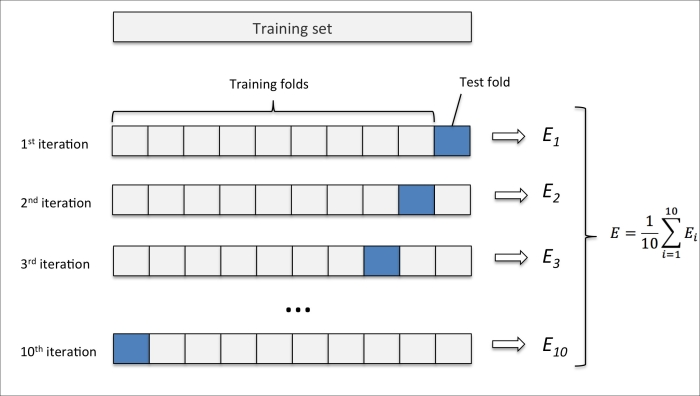

In [3]:
Image("/Users/surthi/gitrepos/ml-notes/images/k-fold-cross-validation.jpg")

In [37]:
%run '6.1 Model Evaluation and HyperParameter Tuning.ipynb'

Done loading data and pipeline


In [32]:
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

scores = []
for k, (train,test) in enumerate(kfold):
    p.fit(X_train[train], y_train[train])
    score = p.score(X_train[test], y_train[test])
    scores.append(p.score(X_train[test], y_train[test]))
    print('%d th iter, ClassDist: %s, AccScore: %.3f' %(k+1, np.bincount(y_train[train]), score))
    
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    

1 th iter, ClassDist: [256 153], AccScore: 0.891
2 th iter, ClassDist: [256 153], AccScore: 0.978
3 th iter, ClassDist: [256 153], AccScore: 0.978
4 th iter, ClassDist: [256 153], AccScore: 0.913
5 th iter, ClassDist: [256 153], AccScore: 0.935
6 th iter, ClassDist: [257 153], AccScore: 0.978
7 th iter, ClassDist: [257 153], AccScore: 0.933
8 th iter, ClassDist: [257 153], AccScore: 0.956
9 th iter, ClassDist: [257 153], AccScore: 0.978
10 th iter, ClassDist: [257 153], AccScore: 0.956
CV accuracy: 0.950 +/- 0.029


# Scikit's cross_val_score
We can avoid manual step of "enumerate, fit and keep track of scores" which we did in the above section using cross_val_score module as shown below:

[Note: An extremely useful feature of the cross_val_score approach is that we can distribute the evaluation of the different folds across multiple CPUs on our machine. n_jobs param decides number of CPU's]


In [35]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=p, X=X_train, y=y_train, cv=10, n_jobs=1)
print "Scores:", scores
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]
CV accuracy: 0.950 +/- 0.029
